In [ ]:
# I will be making a BayesNet that takes in a vector of features, sums up the vector,
# and then outputs a vector of probabilities.

# First - Finish the data
# Second - import data and extract features (can be preliminary)
# Third - Sum up features and calculate probabilities
# Fourth - Output probabilities for a given word (context)
# Fifth - Turn probabilities into a pronunciation by checking against the given ON/KUN pronunciations
# Lastly - Output and format the data beautifully (create into a blackbox)

#### PLEASE NOTE - ALLKANJI NOW CONTAINS SINGLE CHARACTER WORDS AS WELL ####

In [1]:
import re
#import unicodedata
import pickle

In [2]:
true_dict = pickle.load(open('true.p','rb')) # This is the dictionary that contains all of the regular vocab

In [16]:
########## FULL PRONUNCIATIONS ###########

## TODO: Also get length of vocabulary word (single character words probably use KUNYOMI/follow a pattern, etc)

### all dictionaries except for globals start with curKanji...

### This means that all dictionaries are [curKanji][arg1][arg2] = counter (or error if not in dictionary)
### Essentially backwards
#def init():
currentPronunciation = dict() # 

previousPronunciationCurrentPronunciation = dict() # prev, curPron -- (V) curPron, prev
nextPronunciationCurrentPronunciation = dict() # 
previousCharacterCurrentPronunciation = dict() # 
nextCharacterCurrentPronunciation = dict() # 
allKanjiCurrentPronunciation = dict() # 

# Features given pronunciation
currentPronunciationPreviousPronunciation = dict() #
currentPronunciationNextPronunciation = dict() # 
currentPronunciationPreviousCharacter = dict() # 
currentPronunciationNextCharacter = dict() # 
currentPronunciationAllKanji = dict() # 

currentKanjiPreviousPronunciation = dict() #
currentKanjiNextPronunciation = dict() # 
currentKanjiPreviousCharacter = dict() # 
currentKanjiNextCharacter = dict() # 
currentKanjiAllKanji = dict() # 
currentKanjiOneChar = dict()

# New for totals... ###
globalPreviousPronunciation = dict() ### -> dict() -> [prevPron][curPron]
globalPreviousCharacter = dict() ### -> [prevChar][curPron]
globalNextPronunciation = dict() ### -> [nextPron][curPron]
globalNextCharacter = dict() ### -> [nextChar][curPron]
##GLOBALGLOBALS
allKanjiCurrentPronunciation = dict() # [curPron]
allKanjiCurrentPronunciationPreviousPronunciation = dict() # [curPron][prevPron]
allKanjiCurrentPronunciationNextPronunciation = dict()
allKanjiCurrentPronunciationPreviousCharacter = dict()
allKanjiCurrentPronunciationNextCharacter = dict()
allKanjiCurrentPronunciationAllKanji = dict()

###
# number of characters in word
# 

def updateAllKanji(curKanji, curPron, allKanji):
    global allKanjiCurrentPronunciation, currentPronunciationAllKanji, currentKanjiAllKanji
    currentKanjiAllKanji[curKanji] = currentKanjiAllKanji.get(curKanji, dict())
    currentKanjiAllKanji[curKanji][allKanji] = currentKanjiAllKanji[curKanji].get(allKanji, 0) + 1
    currentPronunciationAllKanji[curKanji] = currentPronunciationAllKanji.get(curKanji, dict())
    currentPronunciationAllKanji[curKanji][curPron] = currentPronunciationAllKanji[curKanji].get(curPron, {True:0,False:0})
    currentPronunciationAllKanji[curKanji][curPron][allKanji] = currentPronunciationAllKanji[curKanji][curPron][allKanji] + 1
    allKanjiCurrentPronunciation[curKanji] = allKanjiCurrentPronunciation.get(curKanji, dict())
    allKanjiCurrentPronunciation[curKanji][allKanji] = allKanjiCurrentPronunciation[curKanji].get(allKanji, dict())
    allKanjiCurrentPronunciation[curKanji][allKanji][curPron] = allKanjiCurrentPronunciation[curKanji][allKanji].get(curPron,0) + 1
    
def updateCurPron(curKanji, curPron, oneChar):
    global currentPronunciation, v_cur_pron
    currentPronunciation[curKanji] = currentPronunciation.get(curKanji, dict())
    currentPronunciation[curKanji][curPron] = currentPronunciation[curKanji].get(curPron, 0) + 1
    currentKanjiOneChar[curKanji] = currentKanjiOneChar.get(curKanji, dict())
    currentKanjiOneChar[curKanji][oneChar] = currentKanjiOneChar[curKanji].get(oneChar, dict())
    currentKanjiOneChar[curKanji][oneChar][curPron] = currentKanjiOneChar[curKanji][oneChar].get(curPron, 0) + 1
    

def updatePrevPron(curKanji, prevPron, curPron):
    global previousPronunciationCurrentPronunciation, currentPronunciationPreviousPronunciation, globalPreviousPronunciation, currentKanjiPreviousPronunciation
    currentKanjiPreviousPronunciation[curKanji] = currentKanjiPreviousPronunciation.get(curKanji, dict())
    currentKanjiPreviousPronunciation[curKanji][prevPron] = currentKanjiPreviousPronunciation[curKanji].get(prevPron, 0) + 1
    previousPronunciationCurrentPronunciation[curKanji] = previousPronunciationCurrentPronunciation.get(curKanji, dict())
    previousPronunciationCurrentPronunciation[curKanji][prevPron] = previousPronunciationCurrentPronunciation[curKanji].get(prevPron, dict())
    previousPronunciationCurrentPronunciation[curKanji][prevPron][curPron] = previousPronunciationCurrentPronunciation[curKanji][prevPron].get(curPron,0) + 1
    currentPronunciationPreviousPronunciation[curKanji] = currentPronunciationPreviousPronunciation.get(curKanji, dict())
    currentPronunciationPreviousPronunciation[curKanji][curPron] = currentPronunciationPreviousPronunciation[curKanji].get(curPron, dict())
    currentPronunciationPreviousPronunciation[curKanji][curPron][prevPron] = currentPronunciationPreviousPronunciation[curKanji][curPron].get(prevPron,0) + 1
    globalPreviousPronunciation[prevPron] = globalPreviousPronunciation.get(prevPron, dict())
    globalPreviousPronunciation[prevPron][curPron] = globalPreviousPronunciation[prevPron].get(curPron, 0) + 1
    
def updatePrevChar(curKanji, prevChar, curPron):
    global previousCharacterCurrentPronunciation, currentPronunciationNextCharacter, globalPreviousCharacter, currentKanjiPreviousCharacter
    currentKanjiPreviousCharacter[curKanji] = currentKanjiPreviousCharacter.get(curKanji, dict())
    currentKanjiPreviousCharacter[curKanji][prevChar] = currentKanjiPreviousCharacter[curKanji].get(prevChar, 0) + 1
    previousCharacterCurrentPronunciation[curKanji] = previousCharacterCurrentPronunciation.get(curKanji, dict())
    previousCharacterCurrentPronunciation[curKanji][prevChar] = previousCharacterCurrentPronunciation[curKanji].get(prevChar, dict())
    previousCharacterCurrentPronunciation[curKanji][prevChar][curPron] = previousCharacterCurrentPronunciation[curKanji][prevChar].get(curPron,0) + 1
    currentPronunciationPreviousCharacter[curKanji] = currentPronunciationPreviousCharacter.get(curKanji, dict())
    currentPronunciationPreviousCharacter[curKanji][curPron] = currentPronunciationPreviousCharacter[curKanji].get(curPron, dict())
    currentPronunciationPreviousCharacter[curKanji][curPron][prevChar] = currentPronunciationPreviousCharacter[curKanji][curPron].get(prevChar,0) + 1
    globalPreviousCharacter[prevChar] = globalPreviousCharacter.get(prevChar, dict())
    globalPreviousCharacter[prevChar][curPron] = globalPreviousCharacter[prevChar].get(curPron, 0) + 1
    
def updateNextPron(curKanji, nextPron, curPron):
    global nextPronunciationCurrentPronunciation, currentPronunciationNextPronunciation, globalNextPronunciation, currentKanjiNextPronunciation
    currentKanjiNextPronunciation[curKanji] = currentKanjiNextPronunciation.get(curKanji, dict())
    currentKanjiNextPronunciation[curKanji][nextPron] = currentKanjiNextPronunciation[curKanji].get(nextPron, 0) + 1
    nextPronunciationCurrentPronunciation[curKanji] = nextPronunciationCurrentPronunciation.get(curKanji, dict())
    nextPronunciationCurrentPronunciation[curKanji][nextPron] = nextPronunciationCurrentPronunciation[curKanji].get(nextPron, dict())
    nextPronunciationCurrentPronunciation[curKanji][nextPron][curPron] = nextPronunciationCurrentPronunciation[curKanji][nextPron].get(curPron,0) + 1
    currentPronunciationNextPronunciation[curKanji] = currentPronunciationNextPronunciation.get(curKanji, dict())
    currentPronunciationNextPronunciation[curKanji][curPron] = currentPronunciationNextPronunciation[curKanji].get(curPron, dict())
    currentPronunciationNextPronunciation[curKanji][curPron][nextPron] = currentPronunciationNextPronunciation[curKanji][curPron].get(nextPron,0) + 1
    globalNextPronunciation[nextPron] = globalNextPronunciation.get(nextPron, dict())
    globalNextPronunciation[nextPron][curPron] = globalNextPronunciation[nextPron].get(curPron, 0) + 1
    
def updateNextChar(curKanji, nextChar, curPron):
    global nextCharacterCurrentPronunciation, currentPronunciationNextCharacter, globalNextCharacter, currentKanjiNextCharacter
    currentKanjiNextCharacter[curKanji] = currentKanjiNextCharacter.get(curKanji, dict())
    currentKanjiNextCharacter[curKanji][nextChar] = currentKanjiNextCharacter[curKanji].get(nextChar, 0) + 1
    nextCharacterCurrentPronunciation[curKanji] = nextCharacterCurrentPronunciation.get(curKanji, dict())
    nextCharacterCurrentPronunciation[curKanji][nextChar] = nextCharacterCurrentPronunciation[curKanji].get(nextChar, dict())
    nextCharacterCurrentPronunciation[curKanji][nextChar][curPron] = nextCharacterCurrentPronunciation[curKanji][nextChar].get(curPron,0) + 1
    currentPronunciationNextCharacter[curKanji] = currentPronunciationNextCharacter.get(curKanji, dict())
    currentPronunciationNextCharacter[curKanji][curPron] = currentPronunciationNextCharacter[curKanji].get(curPron, dict())
    currentPronunciationNextCharacter[curKanji][curPron][nextChar] = currentPronunciationNextCharacter[curKanji][curPron].get(nextChar,0) + 1
    globalNextCharacter[nextChar] = globalNextCharacter.get(nextChar, dict())
    globalNextCharacter[nextChar][curPron] = globalNextCharacter[nextChar].get(curPron, 0) + 1

In [37]:
########## PARTIAL PRONUNCIATIONS ###########

## TODO: Also get length of vocabulary word (single character words probably use KUNYOMI/follow a pattern, etc)

previousPronunciationEndCurrentPronunciationStart = dict()
nextPronunciationStartCurrentPronunciationEnd = dict()
previousCharacterCurrentPronunciationStart = dict()
nextCharacterCurrentPronunciationEnd = dict()

def init():
    previousPronunciationEndCurrentPronunciationStart = dict()
    nextPronunciationStartCurrentPronunciationEnd = dict()
    previousCharacterCurrentPronunciationStart = dict()
    nextCharacterCurrentPronunciationEnd = dict()
    currentPronunciation = dict() # 
    previousPronunciationCurrentPronunciation = dict() # prev, curPron -- (V) curPron, prev
    nextPronunciationCurrentPronunciation = dict() # 
    previousCharacterCurrentPronunciation = dict() # 
    nextCharacterCurrentPronunciation = dict() # 
    allKanjiCurrentPronunciation = dict() # 
    currentPronunciationPreviousPronunciation = dict() #
    currentPronunciationNextPronunciation = dict() # 
    currentPronunciationPreviousCharacter = dict() # 
    currentPronunciationNextCharacter = dict() # 
    currentPronunciationAllKanji = dict() # 
    currentKanjiPreviousPronunciation = dict() #
    currentKanjiNextPronunciation = dict() # 
    currentKanjiPreviousCharacter = dict() # 
    currentKanjiNextCharacter = dict() # 
    currentKanjiAllKanji = dict() # 
    currentKanjiOneChar = dict()
    globalPreviousPronunciation = dict() ### -> dict() -> [prevPron][curPron]
    globalPreviousCharacter = dict() ### -> [prevChar][curPron]
    globalNextPronunciation = dict() ### -> [nextPron][curPron]
    globalNextCharacter = dict() ### -> [nextChar][curPron]
    allKanjiCurrentPronunciation = dict() # [curPron]
    allKanjiCurrentPronunciationPreviousPronunciation = dict() # [curPron][prevPron]
    allKanjiCurrentPronunciationNextPronunciation = dict()
    allKanjiCurrentPronunciationPreviousCharacter = dict()
    allKanjiCurrentPronunciationNextCharacter = dict()
    allKanjiCurrentPronunciationAllKanji = dict()

def updatePreviousPronunciation(curPron, prevChar, prevPron):
    if len(prevPron) != 1 and prevPron[-1] in ['ゃ','ゅ','ょ','っ'] and prevPron != 'START':
        prevPron = prevPron[-2:-1]
    else:
        prevPron = prevPron[-1]
    if len(curPron) != 1 and curPron[1] in ['ゃ','ゅ','ょ','っ']:
        curPron = curPron[0:1]
    else:
        curPron = curPron[0]
    previousPronunciationEndCurrentPronunciationStart[prevPron] = previousPronunciationEndCurrentPronunciationStart.get(prevPron,dict())
    previousPronunciationEndCurrentPronunciationStart[prevPron][curPron] = previousPronunciationEndCurrentPronunciationStart[prevPron].get(curPron,0) + 1
    previousCharacterCurrentPronunciationStart[prevChar] = previousCharacterCurrentPronunciationStart.get(prevChar,dict())
    previousCharacterCurrentPronunciationStart[prevChar][curPron] = previousCharacterCurrentPronunciationStart[prevChar].get(curPron,0) + 1
    
def updateNextPronunciation(curPron, nextChar, nextPron):
    if len(nextPron) != 1 and nextPron[1] in ['ゃ','ゅ','ょ','っ'] and nextPron != 'END':
        nextPron = nextPron[0:1]
    else:
        nextPron = nextPron[-1]
    if len(curPron) != 1 and curPron[-1] in ['ゃ','ゅ','ょ','っ']:
        curPron = curPron[-2:-1]
    else:
        curPron = curPron[0]
    nextPronunciationStartCurrentPronunciationEnd[nextPron] = nextPronunciationStartCurrentPronunciationEnd.get(nextPron,dict())
    nextPronunciationStartCurrentPronunciationEnd[nextPron][curPron] = nextPronunciationStartCurrentPronunciationEnd[nextPron].get(curPron,0) + 1
    nextCharacterCurrentPronunciationEnd[nextChar] = nextCharacterCurrentPronunciationEnd.get(nextChar,dict())
    nextCharacterCurrentPronunciationEnd[nextChar][curPron] = nextCharacterCurrentPronunciationEnd[nextChar].get(curPron,0) + 1


In [38]:
def createBayes():
    """Creates the Bayesian Network by creating dictionaries of occurences"""
    init()
    for kanji, pronunciation in true_dict.items():
        oneChar = False
        if len(kanji) == 1:
            oneChar = True
        if re.search("""[\u3040-\u30ff]+""", kanji) == None and len(kanji) != 0: # Finds kana
            kanjiWord = True
        else: # either kana is present or the word is a singular character
            kanjiWord = False
        for i in range(len(kanji)):
            updateCurPron(kanji[i], pronunciation[i], oneChar)
            if i == 0: # First and last characters are special cases
                updatePrevPron(kanji[i], 'START', pronunciation[i])
                updatePrevChar(kanji[i], 'START', pronunciation[i])
                updatePreviousPronunciation(pronunciation[i], 'START', 'START')
            else:
                updatePrevPron(kanji[i], pronunciation[i-1], pronunciation[i])
                updatePrevChar(kanji[i], kanji[i-1], pronunciation[i])
                updatePreviousPronunciation(pronunciation[i], kanji[i-1], pronunciation[i-1])
            if i == (len(kanji) - 1):
                updateNextPron(kanji[i], 'END', pronunciation[i])
                updateNextChar(kanji[i], 'END', pronunciation[i])
                updateNextPronunciation(pronunciation[i], 'END', 'END')
            else:
                updateNextPron(kanji[i], pronunciation[i+1], pronunciation[i])
                updateNextChar(kanji[i], kanji[i+1], pronunciation[i])
                updateNextPronunciation(pronunciation[i], kanji[i+1], pronunciation[i+1])
        updateAllKanji(kanji[i], pronunciation[i], kanjiWord)

In [39]:
createBayes()

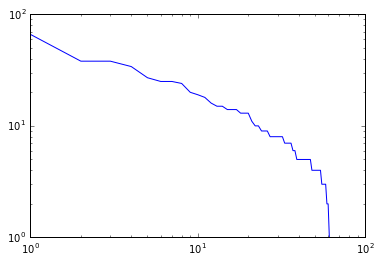

[('し', 66), ('き', 38), ('じ', 38), ('か', 34), ('せ', 27), ('こ', 25), ('り', 25), ('さ', 24), ('け', 20), ('て', 19), ('が', 18), ('い', 16), ('す', 15), ('れ', 15), ('と', 14), ('よ', 14), ('た', 14), ('ぶ', 13), ('そ', 13), ('ど', 13), ('る', 11), ('ほ', 10), ('だ', 10), ('ち', 9), ('ね', 9), ('ぞ', 9), ('ぼ', 8), ('ぎ', 8), ('げ', 8), ('ば', 8), ('に', 8), ('ふ', 8), ('わ', 7), ('ら', 7), ('め', 7), ('ご', 7), ('つ', 6), ('み', 6), ('ろ', 5), ('や', 5), ('ま', 5), ('く', 5), ('ぜ', 5), ('で', 5), ('ひ', 5), ('は', 5), ('あ', 5), ('の', 4), ('な', 4), ('え', 4), ('へ', 4), ('べ', 4), ('ざ', 4), ('も', 4), ('び', 3), ('ぐ', 3), ('ゆ', 3), ('う', 3), ('お', 2), ('ず', 2), ('む', 1)]


In [54]:
temp = sorted(previousPronunciationEndCurrentPronunciationStart['い'].items(), key=lambda kv: kv[1], reverse=True)
### Does this follow Zipf's Law?
y = []
i = 1
x = []
for _,a in temp:
    x.append(i)
    i = i + 1
    y.append(a)
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()

print(sorted(previousPronunciationEndCurrentPronunciationStart['い'].items(), key=lambda kv: kv[1], reverse=True))
# dictionaries for each vector
# value = d.get(key, "empty")
#
# prev_pron, prev_char, all_kanji, reading (kanji: on[1], kun[0]), kanji_pron (kanji: prons), POS?, radicals?,
# singlechar?, 
# check for mixed reading

In [22]:
#allKanjiCurrentPronunciation['人']
currentKanjiOneChar#[curKanji][oneChar] = currentKanjiOneChar[curKanji].get(oneChar, dict())

{'屡': {True: {'しばしば': 1}},
 '靴': {False: {'くつ': 1}, True: {'くつ': 1}},
 '習': {False: {'しゅう': 12, 'なら': 1}},
 '秤': {True: {'はかり': 1}},
 '態': {False: {'たい': 5, 'わざ': 2}},
 '戒': {False: {'かい': 1}},
 '繁': {False: {'はん': 3, 'ぱん': 1}},
 '病': {False: {'びょう': 5, 'や': 1}, True: {'やまい': 1}},
 '択': {False: {'たく': 2}},
 '了': {False: {'りょう': 5}, True: {'りょう': 1}},
 '濫': {False: {'らん': 2}},
 '摩': {False: {'ま': 1}},
 '保': {False: {'たも': 1, 'ほ': 13}},
 '象': {False: {'しょう': 6}, True: {'ぞう': 1}},
 '採': {False: {'さい': 7, 'と': 1}},
 '嘸': {True: {'さぞ': 1}},
 '植': {False: {'う': 3, 'しょく': 2}},
 '忠': {False: {'ちゅう': 2}},
 '並': {False: {'な': 3, 'なみ': 1, 'なら': 3, 'へい': 2}},
 '怪': {False: {'あや': 1, 'かい': 1, 'け': 1}},
 '奥': {False: {'おく': 1}, True: {'おく': 1}},
 '束': {False: {'そく': 3, 'つか': 1}, True: {'たば': 1}},
 '箋': {False: {'せん': 1}},
 '半': {False: {'なか': 1, 'はん': 6}, True: {'はん': 1}},
 '粗': {False: {'あら': 2, 'そ': 1}},
 '迷': {False: {'めい': 2}},
 '有': {False: {'あ': 2, 'う': 1, 'ゆう': 14}},
 '捜': {False: {'さが': 1, '

In [23]:
def getProbabilitiesDebug(kanji=None,prevPron=None,prevChar=None,nextPron=None,nextChar=None,allKanji=None):
    """Inputs: kanji, prevPron?, prevChar?, nextPron?, nextChar?, allKanji?
? = optional
Output: A List of Dictionaries of occurences
TODO: Feed the list of dictionaries to computeProbabilities
This function returns all of the statistics for the current Kanji in
all contexts, independent of each other. This means that the nextPronunciation
dictionary will not be affected by the presence of an allKanji flag.

The order of the dictionaries are:
curPron, prevPron, prevChar, nextPron, nextChar, allKanji
"""
    ### TODO: Update with CurrentKanjiOneChar
    dictionary_list = []
    dictionary_list.append(currentPronunciation.get(kanji, dict()))
    if prevPron == None:
        dictionary_list.append(previousPronunciationCurrentPronunciation.get(kanji, dict()))
    else:
        dictionary_list.append(previousPronunciationCurrentPronunciation.get(kanji, dict()).get(prevPron, dict()))
    if prevChar == None:
        dictionary_list.append(previousCharacterCurrentPronunciation.get(kanji, dict()))
    else:
        dictionary_list.append(previousCharacterCurrentPronunciation.get(kanji, dict()).get(prevChar, dict()))
    if nextPron == None:
        dictionary_list.append(nextPronunciationCurrentPronunciation.get(kanji, dict()))
    else:
        dictionary_list.append(nextPronunciationCurrentPronunciation.get(kanji, dict()).get(nextPron, dict()))
    if nextChar == None:
        dictionary_list.append(nextCharacterCurrentPronunciation.get(kanji, dict()))
    else:
        dictionary_list.append(nextCharacterCurrentPronunciation.get(kanji, dict()).get(nextChar, dict()))
    if allKanji == None:
        dictionary_list.append(allKanjiCurrentPronunciation.get(kanji, dict()))
    else:
        dictionary_list.append(allKanjiCurrentPronunciation.get(kanji, dict()).get(allKanji, dict()))
    return computeProbabilities(dictionary_list)

In [24]:
def getProbabilities(kanji=None,prevPron=None,prevChar=None,nextPron=None,nextChar=None,allKanji=None):
    """Inputs: kanji, prevPron?, prevChar?, nextPron?, nextChar?, allKanji?
? = optional
Output: A List of Dictionaries of occurences
TODO: Feed the list of dictionaries to computeProbabilities
This function returns all of the statistics for the current Kanji in
all contexts, independent of each other. This means that the nextPronunciation
dictionary will not be affected by the presence of an allKanji flag.

The order of the dictionaries are:
curPron, prevPron, prevChar, nextPron, nextChar, allKanji
"""
    dictionary_list = []
    keys = set(currentPronunciation.get(kanji, dict()).keys())
    dictionary_list.append(occurencesToPercentages(currentPronunciation.get(kanji, dict())))
    argument_list = []
    if prevPron != None:
        argument_list.append(prevPron)
        keys = keys | set(currentPronunciationPreviousPronunciation.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationPreviousPronunciation.get(kanji, dict()), prevPron))
    if prevChar != None:
        argument_list.append(prevChar)
        keys = keys | set(currentPronunciationPreviousCharacter.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationPreviousCharacter.get(kanji, dict()), prevChar))
    if nextPron != None:
        argument_list.append(nextPron)
        keys = keys | set(currentPronunciationNextPronunciation.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationNextPronunciation.get(kanji, dict()), nextPron))
    if nextChar != None:
        argument_list.append(nextChar)
        keys = keys | set(currentPronunciationNextCharacter.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationNextCharacter.get(kanji, dict()), nextChar))
    if allKanji != None:
        argument_list.append(allKanji)
        keys = keys | set(currentPronunciationAllKanji.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationAllKanji.get(kanji, dict()), allKanji))
    return bayesTheorem(dictionary_list, keys, argument_list)

In [25]:
def getGlobalProbabilities(kanji=None,prevPron=None,prevChar=None,nextPron=None,nextChar=None,allKanji=None):
    """Inputs: kanji, prevPron?, prevChar?, nextPron?, nextChar?, allKanji?
? = optional
Output: A List of Dictionaries of occurences
TODO: Feed the list of dictionaries to computeProbabilities
This function returns all of the statistics for the current Kanji in
all contexts, independent of each other. This means that the nextPronunciation
dictionary will not be affected by the presence of an allKanji flag.

The order of the dictionaries are:
curPron, prevPron, prevChar, nextPron, nextChar, allKanji
"""
    dictionary_list = []
    keys = set(currentPronunciation.get(kanji, dict()).keys())
    dictionary_list.append(occurencesToPercentages(currentPronunciation.get(kanji, dict())))
    argument_list = []
    if prevPron != None:
        argument_list.append(prevPron)
        keys = keys | set(currentPronunciationPreviousPronunciation.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationPreviousPronunciation.get(kanji, dict()), prevPron))
    if prevChar != None:
        argument_list.append(prevChar)
        keys = keys | set(currentPronunciationPreviousCharacter.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationPreviousCharacter.get(kanji, dict()), prevChar))
    if nextPron != None:
        argument_list.append(nextPron)
        keys = keys | set(currentPronunciationNextPronunciation.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationNextPronunciation.get(kanji, dict()), nextPron))
    if nextChar != None:
        argument_list.append(nextChar)
        keys = keys | set(currentPronunciationNextCharacter.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationNextCharacter.get(kanji, dict()), nextChar))
    if allKanji != None:
        argument_list.append(allKanji)
        keys = keys | set(currentPronunciationAllKanji.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationAllKanji.get(kanji, dict()), allKanji))
    return bayesTheorem(dictionary_list, keys, argument_list)

In [26]:
def bayesTheorem(dictionary_list, keys, argument_list): #kanji
    """Inputs: dictionary_list, keys, argument_list
Outputs: Sorted list of probabilities
This function follows the Bayesian Theorem that as defined
in the following paper https://dl.dropboxusercontent.com/u/62448029/DAG_for_email.pdf
Basic formula:
P(pronunciation|feature1, feature2, ...) =
P(pronunciation)*P(feature1|pronunciation)*P(feature2|pronunciation)* ...
Arguments is synonymous with features in this example
"""
    #print(dictionary_list)
    return_dict = dict()
    for key in keys:
        return_dict[key] = return_dict.get(key, 0) + dictionary_list[0].get(key, 0)
        for i in range(len(argument_list)):
            return_dict[key] = dictionary_list[i + 1].get(key, dict()).get(argument_list[i], 0) * return_dict[key]
    return_dict = occurencesToPercentages(return_dict)
    return sorted(return_dict.items(), key=lambda kv: kv[1], reverse=True)

In [36]:
getGlobalProbabilities('人', allKanji=True)  #, nextpron='び') ### Equivalent to getProbabilities

[('じん', 0.5853658536585366),
 ('にん', 0.25609756097560976),
 ('り', 0.09146341463414633),
 ('ひと', 0.04878048780487804),
 ('びと', 0.018292682926829267)]

In [28]:
def computeProbabilities(list_of_dicts):
    """Input: A single list of dictionaries
Output: A single dictionary of percentages as values
To be called from getProbabilities to convert
the list of dicts of occurences to a single
vector of probabilities."""
    print(list_of_dicts)
    number_of_dicts = len(list_of_dicts)
    if number_of_dicts == 0:
        return dict()
    elif number_of_dicts == 1:
        return occurencesToPercentages(list_of_dicts[0])
    else: ### Define what I am trying to calculate... intersection of percentage vectors??
        keys = set(list_of_dicts[0].keys()) ## copy bayes theorem here and ensure that I correctly copy the formula
        for dictionary in list_of_dicts:
            keys = keys | set(dictionary.keys()) # Get all keys
        return_dict = dict()
        for dictionary in list_of_dicts:
            dictionary = occurencesToPercentages(dictionary)
            for key in keys: ## Currently adding the occurences and then taking the percentage...
                # Bayes Theorem = P(a|b,c,...) = P(a,b,c,...)/P(b,c,...) -Proportional> P(a,b,c,...)
                # Which finally gives P(a)P(b|a)P(c|a)... [P(p)P(f1|a)P(f2|b)...]
                # https://dl.dropboxusercontent.com/u/62448029/DAG_for_email.pdf
                # times a normalizing factor (divide by the sum of all percentages)
                return_dict[key] = return_dict.get(key, 0) * dictionary.get(key, 0)
        return normalizePercentages(return_dict) ## normalize the vector

In [29]:
def occurencesToPercentagesArg(dict_of_occurences, argument):
    """Input: A single dictionary of occurences as values for some key
Output: A single dictionary of percentages as values for some key"""
    
    #for (_, value) in dict_of_occurences.items():
    #    sum = 0
    #    for (_, v) in value.items():
    #        sum += v
    sum_dict = dict()
    for (key1, value1) in dict_of_occurences.items():
        sum = 0
        for (key2, value2) in value1.items():
            sum = sum + value2
        sum_dict[key1] = sum_dict.get(key1, dict())
        sum_dict[key1]['sum'] = sum
        for (key2, value2) in value1.items():
            if sum_dict[key1]['sum'] != 0:
                dict_of_occurences[key1][key2] = value2 / sum_dict[key1]['sum']
    #dict_of_occurences = sorted(dict_of_occurences.items(), key=lambda kv: kv[1], reverse=True)
    return dict_of_occurences

In [30]:
def occurencesToPercentages(dict_of_occurences):
    """Input: A single dictionary of occurences as values for some key
Output: A single dictionary of percentages as values for some key"""
    sum = 0
    for (_, value) in dict_of_occurences.items(): sum += value
    if sum != 0:
        for (key, value) in dict_of_occurences.items():
            dict_of_occurences[key] = value / sum
    #dict_of_occurences = sorted(dict_of_occurences.items(), key=lambda kv: kv[1], reverse=True)
    return dict_of_occurences

In [31]:
def normalizePercentages(dict_of_occurences):
    """Input: A single dictionary of occurences as values for some key
Output: A single, ordered list of percentages as values for some key"""
    sum = 0
    for (_, value) in dict_of_occurences.items(): sum += value
    if sum != 0: ######
        for (key, value) in dict_of_occurences.items():
            dict_of_occurences[key] = value / sum
    dict_of_occurences = sorted(dict_of_occurences.items(), key=lambda kv: kv[1], reverse=True)
    return dict_of_occurences

In [32]:
getProbabilities('人', allKanji=False)  #, nextpron='び')

[('ひと', 1.0), ('びと', 0.0), ('り', 0.0), ('じん', 0.0), ('にん', 0.0)]

In [117]:
help(getProbabilities)

Help on function getProbabilities in module __main__:

getProbabilities(kanji=None, prevPron=None, prevChar=None, nextPron=None, nextChar=None, allKanji=None)
    Inputs: kanji, prevPron?, prevChar?, nextPron?, nextChar?, allKanji?
    ? = optional
    Output: A List of Dictionaries of occurences
    TODO: Feed the list of dictionaries to computeProbabilities
    This function returns all of the statistics for the current Kanji in
    all contexts, independent of each other. This means that the nextPronunciation
    dictionary will not be affected by the presence of an allKanji flag.
    
    The order of the dictionaries are:
    curPron, prevPron, prevChar, nextPron, nextChar, allKanji



In [17]:
#globalPreviousPronunciation
#globalPreviousCharacter
occurencesToPercentages(globalNextPronunciation['あ']) ## works with any dictionary of occurences
#globalNextCharacter['笑']

NameError: name 'globalNextPronunciation' is not defined

In [ ]:
### WHY ALLKANJI MATTERS: 微笑み hoho e mi　微笑 bi shou

In [ ]:
### take all regular and[?] irregular words and push the pronunciations through globalPreviousPronunciation
### and globalNextPronunciation while holding small characters to the previous syllable

In [142]:
currentKanjiAllKanji['人']

{False: 2, True: 31}

In [113]:
currentPronunciation['人']

{'じん': 32, 'にん': 14, 'ひと': 8, 'びと': 1, 'り': 5}

In [114]:
# P(pronunciations of '人'| AllKanji = True) ->
# P(AllKanji = True | pronunciation of '人') P(pronunciations of '人') / P(AllKanji = True)
currentPronunciationAllKanji['人']

{'じん': {False: 0, True: 16},
 'にん': {False: 0, True: 10},
 'ひと': {False: 2, True: 1},
 'びと': {False: 0, True: 1},
 'り': {False: 0, True: 3}}

In [116]:
currentPronunciationNextCharacter['人']

{'じん': {'END': 16,
  '体': 1,
  '公': 1,
  '口': 1,
  '命': 1,
  '工': 1,
  '文': 1,
  '材': 1,
  '格': 1,
  '民': 1,
  '物': 1,
  '生': 1,
  '目': 1,
  '科': 1,
  '種': 1,
  '造': 1,
  '類': 1},
 'にん': {'END': 10, '形': 1, '情': 1, '気': 1, '間': 1},
 'ひと': {'END': 3, '差': 1, '柄': 1, '質': 1, '込': 1, '通': 1},
 'びと': {'END': 1},
 'り': {'END': 3, 'で': 1, '一': 1}}

In [118]:
currentPronunciation['人']

{'じん': 32, 'にん': 14, 'ひと': 8, 'びと': 1, 'り': 5}

In [134]:
currentPronunciationAllKanji['人'].get(False, dict())

{}

In [128]:
currentPronunciationNextCharacter['人']

{'じん': {'END': 16,
  '体': 1,
  '公': 1,
  '口': 1,
  '命': 1,
  '工': 1,
  '文': 1,
  '材': 1,
  '格': 1,
  '民': 1,
  '物': 1,
  '生': 1,
  '目': 1,
  '科': 1,
  '種': 1,
  '造': 1,
  '類': 1},
 'にん': {'END': 10, '形': 1, '情': 1, '気': 1, '間': 1},
 'ひと': {'END': 3, '差': 1, '柄': 1, '質': 1, '込': 1, '通': 1},
 'びと': {'END': 1},
 'り': {'END': 3, 'で': 1, '一': 1}}

In [23]:
createBayes()

In [156]:
currentPronunciationAllKanji.items()

dict_items([('我', {'が': {False: 0, True: 2}}), ('規', {'ぎ': {False: 0, True: 1}, 'き': {False: 0, True: 1}}), ('納', {'のう': {False: 0, True: 1}}), ('違', {'い': {False: 0, True: 1}}), ('景', {'けい': {False: 0, True: 3}}), ('西', {'にし': {False: 0, True: 1}, 'ざい': {False: 0, True: 1}}), ('珠', {'じゅ': {False: 0, True: 1}}), ('化', {'か': {False: 0, True: 7}}), ('婦', {'ふ': {False: 0, True: 2}}), ('野', {'の': {False: 0, True: 1}, 'や': {False: 0, True: 3}}), ('蔑', {'べつ': {False: 0, True: 1}}), ('斎', {'さい': {False: 0, True: 1}}), ('北', {'きた': {False: 0, True: 1}, 'ぼく': {False: 0, True: 1}}), ('任', {'にん': {False: 0, True: 6}}), ('簿', {'ぼ': {False: 0, True: 1}}), ('蚊', {'か': {False: 0, True: 1}}), ('細', {'さい': {False: 0, True: 1}}), ('南', {'みなみ': {False: 0, True: 1}}), ('久', {'きゅう': {False: 0, True: 1}}), ('許', {'きょ': {False: 0, True: 1}}), ('拓', {'たく': {False: 0, True: 1}}), ('志', {'し': {False: 0, True: 2}, 'こころざし': {False: 0, True: 1}}), ('励', {'れい': {False: 0, True: 2}}), ('佐', {'さ': {False: 0, True: 1}

In [180]:
for (k,v) in currentPronunciationAllKanji['人'].items():
    print(k, v)

り {False: 0.0, True: 0.5, 'sum': 1.0}
じん {False: 0.0, True: 0.5, 'sum': 1.0}
にん {False: 0.0, True: 0.5, 'sum': 1.0}
びと {False: 0.0, True: 0.5, 'sum': 1.0}
ひと {False: 0.3333333333333333, True: 0.16666666666666666, 'sum': 1.0}
